#**Gradient Boost Methods**

**Objective**

a) Showcase  gbm classifier techniques

b) Showcase gradient boost regression techniques XGBoost, Catboost, LightGBM

c) showcase gradient boost ranking techniques XGBoost, Catboost, LightGBM

**Impoerting all the required libraries**

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.svm import SVR
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split 
# check xgboost version
import xgboost

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Mining Assignment 1/housing_dataset.csv')
df.head(5)

,rank,property_id,address,latitude,longitude,price,currency,bathrooms,bedrooms,area,land_area,zestimate,rent_zestimate,days_on_zillow,sold_date,is_zillow_owned,image,listing_type,broker_name,input,property_url,listing_url
0,784,2067957778,"31119 Wyndfield Ct, Tomball, TX 77375",30.125583,-95.608875,372785.0,USD,2.0,4.0,2253.0 sqft,NaN,NaN,NaN,0.0,NaN,False,https://photos.zillowstatic.com/fp/19b8c1adba3...,New construction,"Turner Mangum,LLC",https://www.zillow.com/homes/TX_rb/,https://www.zillow.com/homedetails/31119-Wyndf...,https://www.zillow.com/homes/TX_rb/20_p/
1,48,123782868,"700 S 2nd St, Maquoketa, IA 52060",42.059788,-90.667110,45000.0,USD,1.0,1.0,1056.0 sqft,NaN,41100.0,827.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/da7fcd5464e...,House for sale,"eXp Realty, LLC",https://www.zillow.com/homes/IA_rb/,https://www.zillow.com/homedetails/700-S-2nd-S...,https://www.zillow.com/homes/IA_rb/2_p/
2,12,122492394,"8814 Preserve Trl, San Antonio, TX 78254",29.523676,-98.727346,292500.0,USD,3.0,4.0,2499.0 sqft,NaN,324100.0,2199.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/1fe8849b15f...,House for sale,The Ortiz Firm,https://www.zillow.com/homes/TX_rb/,https://www.zillow.com/homedetails/8814-Preser...,https://www.zillow.com/homes/TX_rb/
3,325,30113787,"13 Bushwick Rd, Poughkeepsie, NY 12603",41.666772,-73.835651,535000.0,USD,2.0,3.0,2500.0 sqft,NaN,332400.0,2600.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/b376ecbcd99...,House for sale,Listing by: C21 Alliance Realty Group Wf,https://www.zillow.com/homes/NY_rb/,https://www.zillow.com/homedetails/13-Bushwick...,https://www.zillow.com/homes/NY_rb/9_p/
4,365,768592,"3606 SW 38th St, Des Moines, IA 50321",41.550797,-93.670318,392500.0,USD,4.0,4.0,2335.0 sqft,NaN,386100.0,2282.0,1.0,NaN,False,https://photos.zillowstatic.com/fp/c9701176360...,House for sale,RE/MAX Concepts,https://www.zillow.com/homes/IA_rb/,https://www.zillow.com/homedetails/3606-SW-38t...,https://www.zillow.com/homes/IA_rb/10_p/


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

###**Data Cleaning and Pre=processing**

In [ ]:
print(df.isnull().sum()) 
print(df.isnull().mean())


def find_irrelevant_cols(data):
    col_null_sum = df.isnull().sum().to_list()
    df.isnull().mean()
    for (i,j) in col_null_mean:
        if j > 0.7:
          print(i)

rank                  0
property_id           0
address               0
latitude             72
longitude            72
price                 7
currency              0
bathrooms           227
bedrooms            182
area                350
land_area          3016
zestimate          1196
rent_zestimate      945
days_on_zillow        1
sold_date          3200
is_zillow_owned       0
image                 0
listing_type          0
broker_name         574
input                 0
property_url          0
listing_url           0
dtype: int64
rank               0.000000
property_id        0.000000
address            0.000000
latitude           0.022500
longitude          0.022500
price              0.002188
currency           0.000000
bathrooms          0.070938
bedrooms           0.056875
area               0.109375
land_area          0.942500
zestimate          0.373750
rent_zestimate     0.295312
days_on_zillow     0.000313
sold_date          1.000000
is_zillow_owned    0.000000
image      

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             3200 non-null   int64  
 1   property_id      3200 non-null   int64  
 2   address          3200 non-null   object 
 3   latitude         3128 non-null   float64
 4   longitude        3128 non-null   float64
 5   price            3193 non-null   float64
 6   currency         3200 non-null   object 
 7   bathrooms        2973 non-null   float64
 8   bedrooms         3018 non-null   float64
 9   area             2850 non-null   object 
 10  land_area        184 non-null    object 
 11  zestimate        2004 non-null   float64
 12  rent_zestimate   2255 non-null   float64
 13  days_on_zillow   3199 non-null   float64
 14  sold_date        0 non-null      float64
 15  is_zillow_owned  3200 non-null   bool   
 16  image            3200 non-null   object 
 17  listing_type  

In [ ]:
df.zestimate.fillna(df.price, inplace=True)

In [ ]:
df['area'] = df['area'].apply(lambda a: (str(a).replace("sqft", ""))).astype(float)

In [ ]:
df.area.fillna(0,inplace=True)

In [ ]:
df.info()
df.drop(['address', 'latitude','longitude','rent_zestimate','listing_type', 'input', 'property_url', 'listing_url'], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             3200 non-null   int64  
 1   property_id      3200 non-null   int64  
 2   address          3200 non-null   object 
 3   latitude         3128 non-null   float64
 4   longitude        3128 non-null   float64
 5   price            3193 non-null   float64
 6   currency         3200 non-null   object 
 7   bathrooms        2973 non-null   float64
 8   bedrooms         3018 non-null   float64
 9   area             3200 non-null   float64
 10  land_area        184 non-null    object 
 11  zestimate        3193 non-null   float64
 12  rent_zestimate   2255 non-null   float64
 13  days_on_zillow   3199 non-null   float64
 14  sold_date        0 non-null      float64
 15  is_zillow_owned  3200 non-null   bool   
 16  image            3200 non-null   object 
 17  listing_type  

In [ ]:
df.head(2)

,rank,property_id,price,currency,bathrooms,bedrooms,area,land_area,zestimate,days_on_zillow,sold_date,is_zillow_owned,image,broker_name
0,784,2067957778,372785.0,USD,2.0,4.0,2253.0,NaN,372785.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/19b8c1adba3...,"Turner Mangum,LLC"
1,48,123782868,45000.0,USD,1.0,1.0,1056.0,NaN,41100.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/da7fcd5464e...,"eXp Realty, LLC"


In [ ]:
df.drop('currency',axis=1)

,rank,property_id,price,bathrooms,bedrooms,area,land_area,zestimate,days_on_zillow,sold_date,is_zillow_owned,image,broker_name
0,784,2067957778,372785.0,2.0,4.0,2253.0,NaN,372785.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/19b8c1adba3...,"Turner Mangum,LLC"
1,48,123782868,45000.0,1.0,1.0,1056.0,NaN,41100.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/da7fcd5464e...,"eXp Realty, LLC"
2,12,122492394,292500.0,3.0,4.0,2499.0,NaN,324100.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/1fe8849b15f...,The Ortiz Firm
3,325,30113787,535000.0,2.0,3.0,2500.0,NaN,332400.0,0.0,NaN,False,https://photos.zillowstatic.com/fp/b376ecbcd99...,Listing by: C21 Alliance Realty Group Wf
4,365,768592,392500.0,4.0,4.0,2335.0,NaN,386100.0,1.0,NaN,False,https://photos.zillowstatic.com/fp/c9701176360...,RE/MAX Concepts
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,162,13326272,650000.0,2.0,3.0,2193.0,NaN,650000.0,5.0,NaN,False,https://photos.zillowstatic.com/fp/7f57c80f862...,ERA New Age
3196,261,2076995281,527000.0,3.0,4.0,2458.0,NaN,527000.0,7.0,NaN,False,https://photos.zillowstatic.com/fp/82e8f93508e...,NaN
3197,234,96099897,1370000.0,5.0,3.0,3200.0,NaN,1402800.0,6.0,NaN,False,https://photos.zillowstatic.com/fp/e9e1eb8d9d4...,Milehimodern
3198,603,13378280,419900.0,2.0,2.0,1628.0,NaN,424800.0,30.0,NaN,False,https://photos.zillowstatic.com/fp/0a88802b05c...,MV Realty of Colorado LLC


In [ ]:
df.isnull().sum()

rank                  0
property_id           0
price                 7
currency              0
bathrooms           227
bedrooms            182
area                  0
land_area          3016
zestimate             7
days_on_zillow        1
sold_date          3200
is_zillow_owned       0
image                 0
broker_name         574
dtype: int64

In [ ]:
df.drop(['currency', 'land_area'], axis=1, inplace=True)

In [ ]:
df.fillna(999, inplace=True)

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
df.drop(['image', 'broker_name'], axis=1, inplace=True)

In [ ]:
df.head(2)

,rank,property_id,price,bathrooms,bedrooms,area,zestimate,days_on_zillow,sold_date,is_zillow_owned
0,784,2067957778,372785.0,2.0,4.0,2253.0,372785.0,0.0,999.0,False
1,48,123782868,45000.0,1.0,1.0,1056.0,41100.0,0.0,999.0,False


##**Regressor Techniques**

**Implementing regressor techniques for XGBoost, Catboost, LightGBM**

In [ ]:
pip install xgboost

In [ ]:
pip install catboost

In [ ]:
df_classifier = df.copy()
df_regressor = df.copy()

In [ ]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
def regresssorloop(data,feat):


  kernel = DotProduct() + WhiteKernel()
 
  names = ["XGBRegressor","CatBoostRegressor","LGBMRegressor"]
 #CatBoostRegressor(verbose=0, n_estimators=100) 
  regressors = [ XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8), CatBoostRegressor(verbose=0, n_estimators=100),LGBMRegressor()]

  gbm = lgb.LGBMRanker()
  
  X =  data[['area','bedrooms','bathrooms']].values
  X = StandardScaler().fit_transform(data)
  y = data['price'].values
  
  X_train, X_test, y_train, y_test = \
      train_test_split(X, y, test_size=.2)

  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
  query_train = [X_train.shape[0]]
  query_val = [X_val.shape[0]]
  query_test = [X_test.shape[0]]

  max_score = 0.0
  max_class = ''
  # iterate over regressors
  for name, clf in zip(names, regressors):
     
      clf.fit(X_train, y_train)
      clf.fit(X_train, y_train)
      
      score = 100.0 * clf.score(X_test, y_test)
      pred = clf.predict(X_train)
      r2 = r2_score(y_train, pred)
      print('R2 SCORE = %.2f,' %(r2))
      print('regressors = %s, Score (test, accuracy) = %.2f,' %(name, score))
      
      if score > max_score:
          reg_best = clf
          max_score = score
          max_class = name

  print(80*'-' )
  print('Best --> regressors = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

In [ ]:
feat=3
regresssorloop(df_regressor,feat)


[03:08:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:08:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 SCORE = 1.00,
regressors = XGBRegressor, Score (test, accuracy) = 99.79,
R2 SCORE = 1.00,
regressors = CatBoostRegressor, Score (test, accuracy) = 99.56,
R2 SCORE = 0.81,
regressors = LGBMRegressor, Score (test, accuracy) = 92.32,
--------------------------------------------------------------------------------
Best --> regressors = XGBRegressor, Score (test, accuracy) = 99.79


In [ ]:
df.head(2)

,rank,property_id,price,bathrooms,bedrooms,area,zestimate,days_on_zillow,sold_date,is_zillow_owned
0,784,2067957778,372785.0,2.0,4.0,2253.0,372785.0,0.0,999.0,False
1,48,123782868,45000.0,1.0,1.0,1056.0,41100.0,0.0,999.0,False


In [ ]:
from catboost.datasets import msrank_10k
train_df, test_df = msrank_10k()

X_train = train_df.drop([0, 1], axis=1).values
y_train = train_df[0].values
queries_train = train_df[1].values

X_test = test_df.drop([0, 1], axis=1).values
y_test = test_df[0].values
queries_test = test_df[1].values

In [ ]:
num_documents = X_train.shape[0]
print(num_documents)

10000


In [ ]:
X_train.shape[1]

136

In [ ]:
from collections import Counter
Counter(y_train).items()

dict_items([(2.0, 1326), (0.0, 5481), (1.0, 3000), (3.0, 142), (4.0, 51)])

In [ ]:
max_relevance = np.max(y_train)
y_train /= max_relevance
y_test /= max_relevance

In [ ]:
num_queries = np.unique(queries_train).shape[0]
num_queries

87

###**Classifier Techniques**

**Applying the classifier techniques for XGBoost,CatBoost and LGBM**

# XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
iris = load_iris()
x, y = iris.data, iris.target

In [ ]:
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)

In [ ]:
xgbc = XGBClassifier()
print(xgbc)
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1) 

XGBClassifier()


XGBClassifier(objective='multi:softprob')

In [ ]:
xgbc.fit(xtrain, ytrain)

XGBClassifier(objective='multi:softprob')

In [ ]:
scores = cross_val_score(xgbc, xtrain, ytrain, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.94


In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.94


In [ ]:
ypred = xgbc.predict(xtest)
cm = confusion_matrix(ytest,ypred)
print(cm)

[[11  0  0]
 [ 0  6  0]
 [ 0  0  6]]


# LightGBM Classifier

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
import lightgbm as lgb

In [ ]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

In [ ]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

([], <a list of 0 Text major ticklabel objects>)

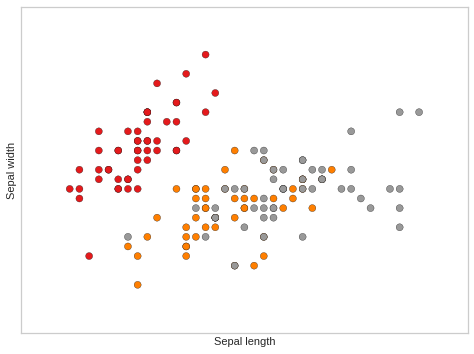

In [ ]:
plt.figure(2, figsize=(8, 6))
plt.clf()
# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

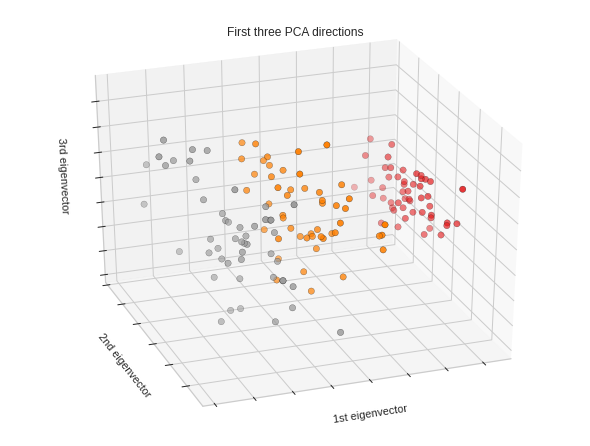

In [ ]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = iris.data  # we only take the first two features.
y = iris.target
print(np.shape(X))
print(np.shape(y))
le = preprocessing.LabelEncoder() #
y_label=le.fit_transform(y)
classes=le.classes_

(150, 4)
(150,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.30, random_state=42)

In [ ]:
params = {
          "objective" : "multiclass",
          "num_class" : 4,
          "num_leaves" : 60,
          "max_depth": -1,
          "learning_rate" : 0.01,
          "bagging_fraction" : 0.9,  # subsample
          "feature_fraction" : 0.9,  # colsample_bytree
          "bagging_freq" : 5,        # subsample_freq
          "bagging_seed" : 2018,
          "verbosity" : -1 }

### Applying LGB classifier

In [ ]:
lgtrain, lgval = lgb.Dataset(X_train, y_train), lgb.Dataset(X_test, y_test)
lgbmodel = lgb.train(params, lgtrain, 2000, valid_sets=[lgtrain, lgval], early_stopping_rounds=100, verbose_eval=200)

Training until validation scores don't improve for 100 rounds.
[200]	training's multi_logloss: 0.23822	valid_1's multi_logloss: 0.178067
[400]	training's multi_logloss: 0.111684	valid_1's multi_logloss: 0.0617797
[600]	training's multi_logloss: 0.0704905	valid_1's multi_logloss: 0.0300997
[800]	training's multi_logloss: 0.0513517	valid_1's multi_logloss: 0.0196325
[1000]	training's multi_logloss: 0.0394966	valid_1's multi_logloss: 0.0173324
Early stopping, best iteration is:
[910]	training's multi_logloss: 0.0442766	valid_1's multi_logloss: 0.0168562


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

y_pred =np.argmax(lgbmodel.predict(X_test),axis=1)
y_true =y_test

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


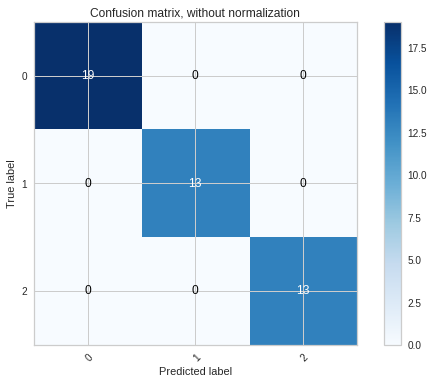

In [ ]:
plot_confusion_matrix(y_true, y_pred, classes=classes,
                      title='Confusion matrix, without normalization')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

1.0

# CatBoost Classifier

In [ ]:
!pip3 install graphviz
!pip3 install ipywidgets
!pip3 install shap
!pip3 install seaborn

In [ ]:
import io
import sys
import json
from time import time
from datetime import datetime, timedelta
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, auc, accuracy_score, roc_auc_score, confusion_matrix, roc_curve

%matplotlib inline

In [ ]:
%pip install catboost
from catboost import CatBoostClassifier, Pool
import random

def seed_everything(seed=None):
    if seed is None:
        seed = np.random.randint(100)
    random.seed(seed)
    np.random.seed(seed)
    return seed
seed = seed_everything(42)

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

def load_new_data():
    iris = load_iris()
    df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

    df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
    return df

df = load_new_data()
print(df.info())
print(df.species.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   target             150 non-null    float64 
 5   species            150 non-null    category
dtypes: category(1), float64(5)
memory usage: 6.2 KB
None
virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64


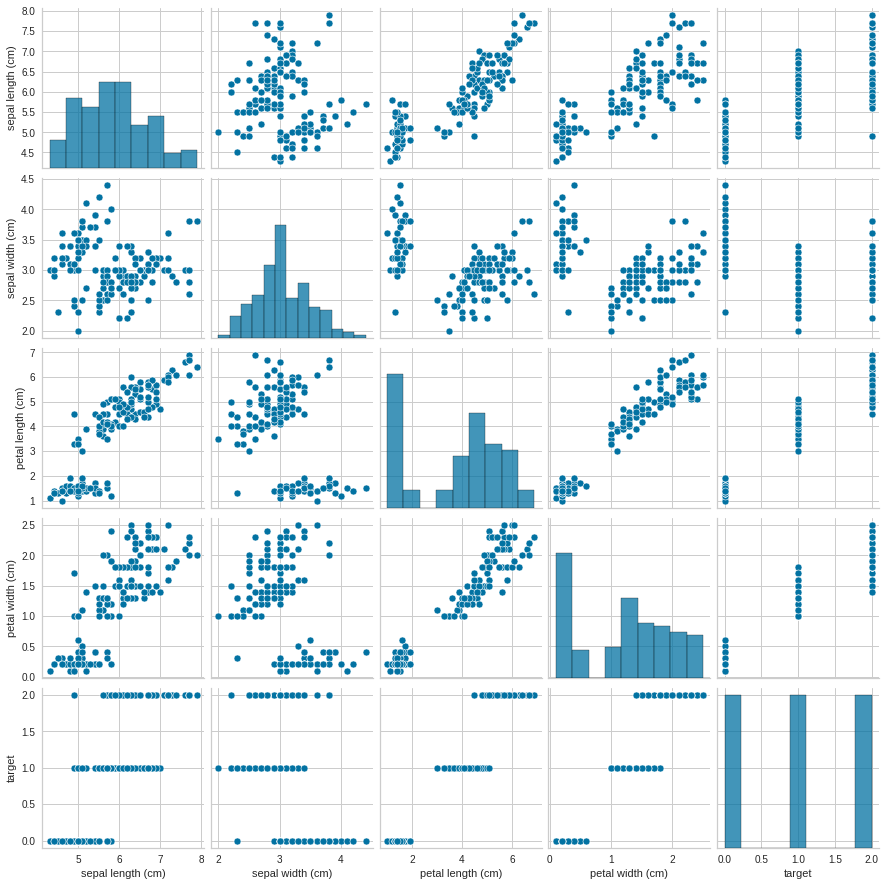

In [ ]:
sns.pairplot(df)

### Splitting data and filtering

In [ ]:
# all where nan inf or -inf
filter_ = ~(df.isin([np.nan, np.inf, -np.inf]).any(axis=1))
df = df.loc[filter_]

df_tr, df_eval = train_test_split(df)

print("TRAINING")
print(df_tr.head())
print(df_tr.species.value_counts())

print("EVALUATION")
print(df_eval.head())
print(df_eval.species.value_counts())

TRAINING
     sepal length (cm)  sepal width (cm)  ...  target     species
4                  5.0               3.6  ...     0.0      setosa
32                 5.2               4.1  ...     0.0      setosa
142                5.8               2.7  ...     2.0   virginica
85                 6.0               3.4  ...     1.0  versicolor
86                 6.7               3.1  ...     1.0  versicolor

[5 rows x 6 columns]
versicolor    39
virginica     38
setosa        35
Name: species, dtype: int64
EVALUATION
     sepal length (cm)  sepal width (cm)  ...  target     species
73                 6.1               2.8  ...     1.0  versicolor
18                 5.7               3.8  ...     0.0      setosa
118                7.7               2.6  ...     2.0   virginica
78                 6.0               2.9  ...     1.0  versicolor
76                 6.8               2.8  ...     1.0  versicolor

[5 rows x 6 columns]
setosa        15
virginica     12
versicolor    11
Name: species,

## Binary CatBoost Classifier for the Virginica

In [ ]:
X_tr = df_tr
X_eval = df_eval

y_tr = X_tr.species
y_tr_clean = y_tr == 'virginica'
X_tr.drop(columns=['species', 'target'], inplace=True)

y_eval =  X_eval.species
y_eval_clean = y_eval == 'virginica'
X_eval.drop(columns=['species', 'target'], inplace=True)

train_dataset = Pool(df_tr, y_tr_clean, feature_names=list(df_tr.columns))

model_params = {
    'iterations': 10, 
    'loss_function': 'Logloss',
    'train_dir': 'crossentropy',
    'allow_writing_files': False,
    'random_seed': 42,
}

model = CatBoostClassifier(**model_params)
model.fit(train_dataset, verbose=True, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.276026
0:	learn: 0.5796649	total: 748us	remaining: 6.74ms
1:	learn: 0.4916798	total: 1.66ms	remaining: 6.63ms
2:	learn: 0.4090660	total: 2.39ms	remaining: 5.57ms
3:	learn: 0.3639077	total: 3.67ms	remaining: 5.5ms
4:	learn: 0.3141899	total: 4.29ms	remaining: 4.29ms
5:	learn: 0.2750883	total: 4.96ms	remaining: 3.31ms
6:	learn: 0.2463576	total: 6.04ms	remaining: 2.59ms
7:	learn: 0.2230531	total: 8.59ms	remaining: 2.15ms
8:	learn: 0.2064652	total: 9.21ms	remaining: 1.02ms
9:	learn: 0.1935210	total: 9.78ms	remaining: 0us


## Results for Binary Classification Model

In [ ]:
import matplotlib.pyplot as plt


predictions = model.predict_proba(X_eval)[:, 1]
THRESH = 0.5           # Set decision threshold

report_dict = classification_report(y_eval_clean, predictions > THRESH, output_dict=True)
report_dict['accuracy'] = accuracy_score(y_eval_clean, predictions > THRESH)
report_dict['confusion'] = confusion_matrix(y_eval_clean, predictions > THRESH).tolist()
fpr, tpr, threshold = roc_curve(y_eval_clean, predictions, drop_intermediate=False)
report_dict['roc_auc'] = auc(fpr, tpr)
report_dict['roc_curve'] = {'fpr': fpr.tolist(), 'tpr': tpr.tolist(), 'threshold': threshold.tolist()}
report_dict['training_features'] = X_tr.columns.to_list()
report_dict['model_features'] = X_tr.columns.to_list()

importances = model.get_feature_importance()
indices = np.argsort(importances)[::-1]
report_dict['feature_importance'] = {X_tr.columns[idx]: float(importances[idx]) for idx in indices}

from IPython.display import JSON
JSON(report_dict)

<IPython.core.display.JSON object>

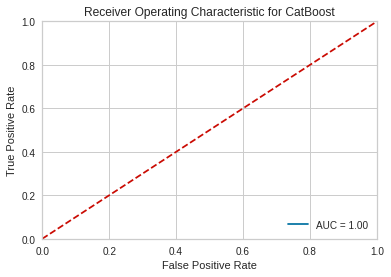

In [ ]:
import matplotlib.pyplot as plt


plt.title('Receiver Operating Characteristic for CatBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % report_dict['roc_auc'])
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

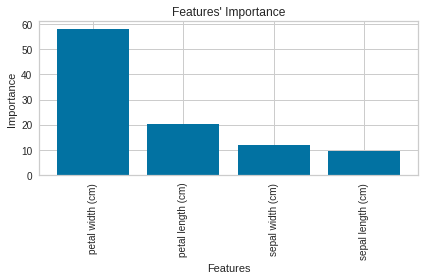

In [ ]:
feat_imp_index = report_dict['feature_importance'].keys()
feat_imp_vals = report_dict['feature_importance'].values()

plt.title("Features' Importance")
plt.bar(feat_imp_index, feat_imp_vals)
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

###**Gradient Boost ranking techniques**

**Applying ranking techniques on XGBoost, Catboost, LightGBM**

##CatBoostRanker


In [ ]:
from catboost import CatBoostRanker, Pool, MetricVisualizer
train = Pool(
    data=X_train,
    label=y_train,
    group_id=queries_train
)

test = Pool(
    data=X_test,
    label=y_test,
    group_id=queries_test
)

In [ ]:
default_parameters = {
    'iterations': 2000,
    'custom_metric': ['NDCG', 'PFound', 'AverageGain:top=10'],
    'verbose': False,
    'random_seed': 0,
}

parameters = {}

In [ ]:
def fit_model(loss_function, additional_params=None, train_pool=train, test_pool=test):
    parameters = deepcopy(default_parameters)
    parameters['loss_function'] = loss_function
    parameters['train_dir'] = loss_function
    
    if additional_params is not None:
        parameters.update(additional_params)
        
    model = CatBoostRanker(**parameters)
    model.fit(train_pool, eval_set=test_pool, plot=True)
    
    return model

In [ ]:
from copy import deepcopy
model = fit_model('RMSE', {'custom_metric': ['PrecisionAt:top=10', 'RecallAt:top=10', 'MAP:top=10']})

/usr/local/lib/python3.7/dist-packages/catboost/core.py:5806: RuntimeWarning: Regression loss ('RMSE') ignores an important ranking parameter 'group_id'
  warnings.warn("Regression loss ('{}') ignores an important ranking parameter 'group_id'".format(loss_function), RuntimeWarning)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
import numpy as np
import pandas as pd
import lightgbm

df = pd.DataFrame({
    "query_id":[i for i in range(100) for j in range(10)],
    "var1":np.random.random(size=(1000,)),
    "var2":np.random.random(size=(1000,)),
    "var3":np.random.random(size=(1000,)),
    "relevance":list(np.random.permutation([0,0,0,0,0, 0,0,0,1,1]))*100
})

In [ ]:
train_df = df[:800]  # first 80%
validation_df = df[800:]  # remaining 20%

qids_train = train_df.groupby("query_id")["query_id"].count().to_numpy()
X_train = train_df.drop(["query_id", "relevance"], axis=1)
y_train = train_df["relevance"]

qids_validation = validation_df.groupby("query_id")["query_id"].count().to_numpy()
X_validation = validation_df.drop(["query_id", "relevance"], axis=1)
y_validation = validation_df["relevance"]

#LGBMRanker


In [ ]:
gbm = lightgbm.LGBMRanker(
    objective="lambdarank",
    metric="ndcg",
)

In [ ]:
gbm.fit(
    X=X_train,
    y=y_train,
    group=qids_train,
    eval_set=[(X_validation, y_validation)],
    eval_group=[qids_validation],
    eval_at=10,
    verbose=10,
)

[10]	valid_0's ndcg@10: 0.561509
[20]	valid_0's ndcg@10: 0.577913
[30]	valid_0's ndcg@10: 0.583597
[40]	valid_0's ndcg@10: 0.609068
[50]	valid_0's ndcg@10: 0.611827
[60]	valid_0's ndcg@10: 0.615683
[70]	valid_0's ndcg@10: 0.609735
[80]	valid_0's ndcg@10: 0.613306
[90]	valid_0's ndcg@10: 0.609335
[100]	valid_0's ndcg@10: 0.606886


LGBMRanker(metric='ndcg', objective='lambdarank')

##XGBRanker

In [ ]:
from xgboost import XGBRanker
xgbmodel = XGBRanker(max_depth=5, learning_rate=0.01, n_estimators=2000, n_jobs=-1, colsample_bytree=0.1)

from sklearn.model_selection import GroupShuffleSplit
gss = GroupShuffleSplit(test_size=.20, n_splits=1, random_state = 7).split(df, groups=df['query_id'])
X_train_inds, X_test_inds = next(gss)
train_data= df.iloc[X_train_inds]
#groups = train_data.groupby('qids_train').size().to_frame('size')['size'].to_numpy()


xgbmodel.fit(X_train, y_train, group=qids_train, verbose=True)

XGBRanker(colsample_bytree=0.1, learning_rate=0.01, max_depth=5,
          n_estimators=2000)